Number of states: 48

Number of actions an agent can take: 4

Current state: 36

Transitions from current state: [0, 1, 2, 3]


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
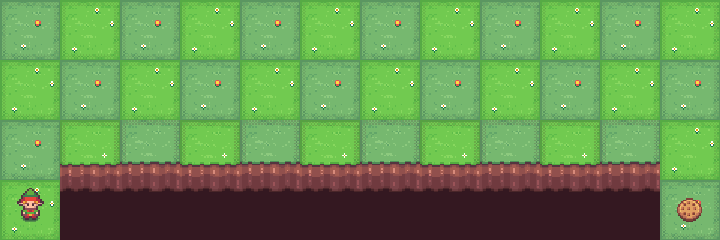

In [53]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


env = gym.make('CliffWalking-v1', render_mode="rgb_array")
current_state, info = env.reset()

action = ["up", "right", "down", "left"]


# 4x12 grid = 48 states
states = env.observation_space.n
print("Number of states:", states)


# left, up, down or right
actions = env.action_space.n
print("\nNumber of actions an agent can take:", actions)


# Current state - "x" state
print("\nCurrent state:", current_state)

def check_availiable_moves(env):
    all_moves = env.action_space.n
    possible_moves = []
    for i in range(all_moves):
        if env.action_space.contains(i):
            possible_moves.append(i)
    return possible_moves

# Where can I go from here -> 4 action
print("\nTransitions from current state:", check_availiable_moves(env))
env.render()

Episode: 0, Reward: -84
Episode: 50, Reward: -24
Episode: 100, Reward: -22
Episode: 150, Reward: -21


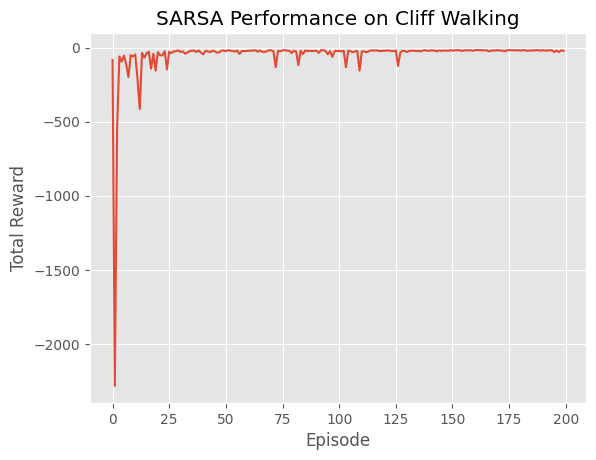

In [52]:
alpha = 0.5
gamma = 1
epsilon = 0.1
episodes = 200
td_lambda = [0, 0.3, 0.5]

# initialise Q(s,a) for states*actions
Q = np.zeros((states, actions))
rewards_per_episode_SARSA = []
rewards_per_episode_Q = []

for episode in range(episodes):
    state, info = env.reset()
    terminated = truncated = False
    total_reward = 0
    e = np.zeros(states)

    # Epsilon-greedy action selection
    if np.random.random() < epsilon:
        action = env.action_space.sample() # Explore
    else:
        action = np.argmax(Q[state]) # Exploit

    while not (terminated or truncated):
        # Take action
        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            next_action = env.action_space.sample() # Explore
        else:
            next_action = np.argmax(Q[next_state]) # Exploit

        # Q-learning update rule
        old_value = Q[state, action]
        next_max = Q[next_state, next_action]

        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        Q[state, action] = new_value

        state = next_state
        action = next_action

    rewards_per_episode_SARSA.append(total_reward)
    if episode % 50 == 0:
        print(f"Episode: {episode}, Reward: {total_reward}")

# Q = np.zeros((states, actions))

# for episode in range(episodes):
#     state, info = env.reset()
#     terminated = truncated = False
#     total_reward = 0

#     while not (terminated or truncated):
#         # Epsilon-greedy action selection
#         if np.random.random() < epsilon:
#             action = env.action_space.sample()  # Explore
#         else:
#             action = np.argmax(Q[state]) # Exploit

#         # Take the action
#         next_state, reward, terminated, truncated, info = env.step(action)
#         total_reward += reward

#         # Q-Learning update rule
#         old_value = Q[state, action]
#         next_max = np.max(Q[next_state])

#         new_value = old_value + alpha * (reward + gamma * next_max - old_value)
#         Q[state, action] = new_value

#         state = next_state

#     rewards_per_episode_Q.append(total_reward)

env.close()

# Plot the learning progress
plt.plot(rewards_per_episode_SARSA)
plt.plot(rewards_per_episode_Q)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('SARSA Performance on Cliff Walking')
plt.show()

In [57]:
def create_heatmap_with_values(data, title="Heatmap", cmap="viridis", fmt=".2f"):
    """
    Create a heatmap with cell values displayed.

    Parameters:
    data: 2D array or list of lists
    title: Title of the plot
    cmap: Colormap to use
    fmt: Format string for the displayed values
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create heatmap using imshow
    im = ax.imshow(data, cmap=cmap, origin='lower')

    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('Values', rotation=-90, va="bottom")

    # Set ticks and labels
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))

    # Add grid lines
    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Display values in each cell
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            # Choose text color based on cell brightness for better contrast
            if data[i, j] > np.mean(data):
                text_color = 'black'
            else:
                text_color = 'white'

            ax.text(j, i, format(data[i, j], fmt),
                   ha="center", va="center",
                   color=text_color, fontweight="bold")

    ax.set_title(title)
    plt.tight_layout()
    plt.show()

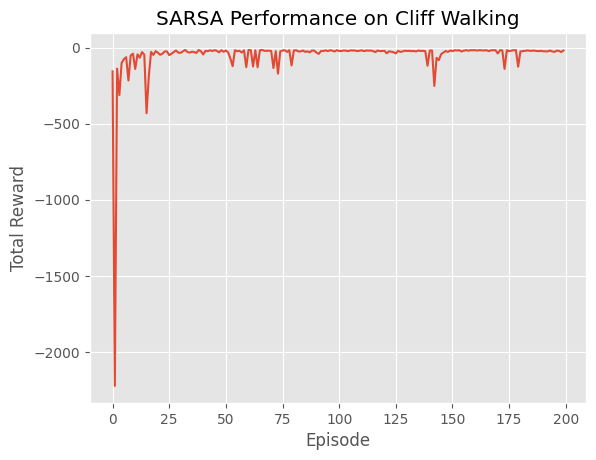

In [60]:
alpha = 0.5
gamma = 1
epsilon = 0.1
episodes = 200
td_lambda = [0, 0.3, 0.5]
current_lambda = 0.0

# initialise Q(s,a) for states*actions
Q = np.zeros((states, actions))
rewards_per_episode_SARSA = np.zeros(episodes)
# rewards_per_episode_Q = []
data = np.zeros((4, 12))

runs = 0

for _ in range(runs):
    for episode in range(episodes):
        state, info = env.reset()
        terminated = truncated = False
        total_reward = 0
        e = np.zeros((states, actions))

        # Epsilon-greedy action selection
        if np.random.random() < epsilon:
            action = env.action_space.sample() # Explore
        else:
            action = np.argmax(Q[state]) # Exploit

        while not (terminated or truncated):
            # Take action
            next_state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward

            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                next_action = env.action_space.sample() # Explore
            else:
                next_action = np.argmax(Q[next_state]) # Exploit

            delta = reward + gamma * Q[next_state, next_action] - Q[state, action]
            e[state, action] += 1

            for t in range(states):
                for a in range(actions):
                    Q[t, a] = Q[t, a] + alpha * delta * e[t, a]
                    e[t, a] = gamma * current_lambda * e[state, action]

            state = next_state
            action = next_action

            for i in range(4):
                for j in range(12):
                    data[i,j] = max(Q[i*12 + j])

            # create_heatmap_with_values(data)

        rewards_per_episode_SARSA[episode] += (total_reward)
        # if episode % 50 == 0:
        #     print(f"Episode: {episode}, Reward: {total_reward}")

env.close()

rewards_per_episode_SARSA/=runs

# Plot the learning progress
plt.plot(rewards_per_episode_SARSA)
# plt.plot(rewards_per_episode_Q)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('SARSA Performance on Cliff Walking')
plt.show()

Starting SARSA(λ) experiment with Gymnasium...
Lambda values: [0, 0.3, 0.5]
Number of runs: 100
Episodes per run: 200
Running SARSA(λ) with λ=0


100%|██████████| 100/100 [01:15<00:00,  1.32it/s]


Running SARSA(λ) with λ=0.3


100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


Running SARSA(λ) with λ=0.5


100%|██████████| 100/100 [01:32<00:00,  1.09it/s]


Creating animation...
Creating performance plots...


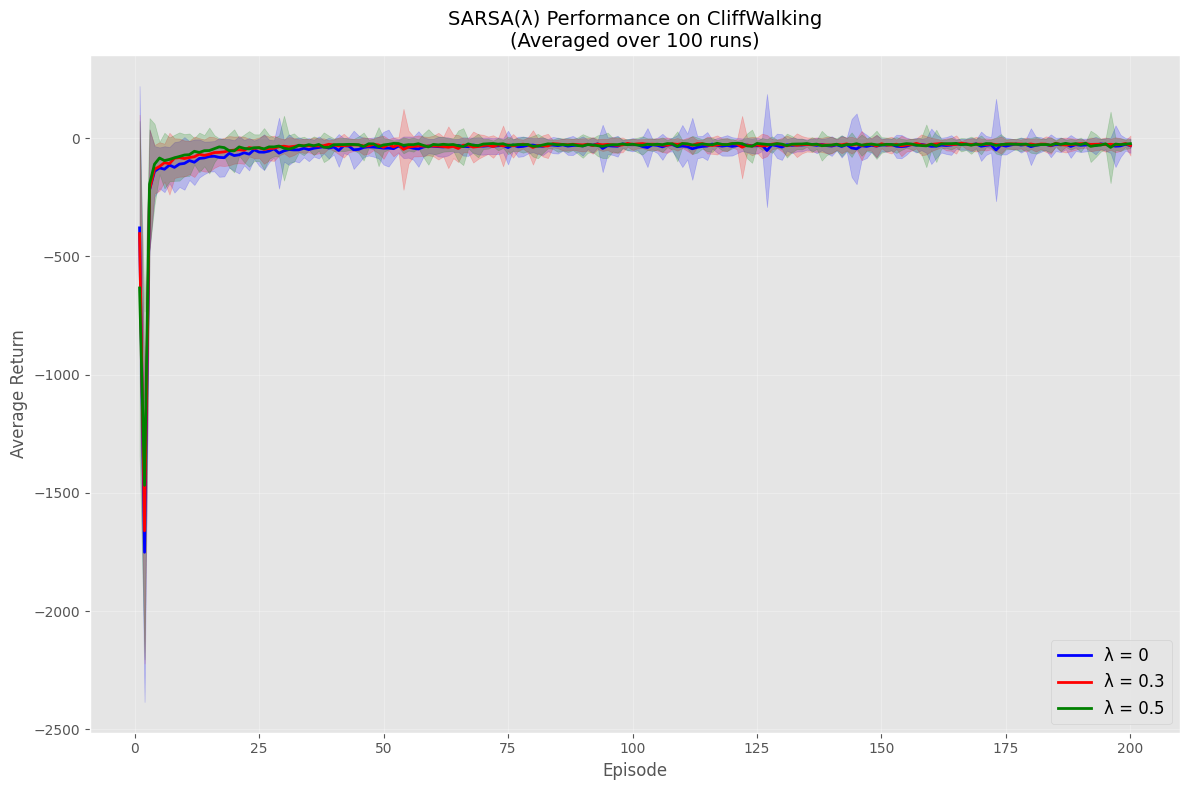

Experiment completed successfully!
Files created:
- sarsa_lambda_animation.gif (animation of value functions)
- sarsa_lambda_performance.png (combined performance plot)
- sarsa_lambda_X_performance.png (individual performance plots)
- sarsa_lambda_results.npz (raw data)


In [65]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

class SarsaLambda:
    def __init__(self, env, lambda_val=0.0, alpha=0.5, gamma=1.0, epsilon=0.1):
        self.env = env
        self.lambda_val = lambda_val
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

        # Initialize Q-table and eligibility traces
        self.nS = env.observation_space.n
        self.nA = env.action_space.n
        self.Q = np.zeros((self.nS, self.nA))
        self.E = np.zeros((self.nS, self.nA))

        # For tracking returns and value functions
        self.returns = []
        self.value_functions = []

    def choose_action(self, state):
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.Q[state])

    def update(self, state, action, reward, next_state, next_action, done):
        # Calculate TD error
        if done:
            target = reward
        else:
            target = reward + self.gamma * self.Q[next_state][next_action]

        delta = target - self.Q[state][action]

        # Update eligibility trace for current state-action pair
        self.E[state][action] += 1

        # Update all state-action pairs
        for s in range(self.nS):
            for a in range(self.nA):
                if self.E[s][a] > 0:
                    self.Q[s][a] += self.alpha * delta * self.E[s][a]
                    self.E[s][a] *= self.gamma * self.lambda_val

        if done:
            self.E.fill(0)

    def train(self, episodes):
        for episode in range(episodes):
            state, _ = self.env.reset()
            action = self.choose_action(state)

            total_reward = 0
            done = False
            truncated = False

            while not done and not truncated:
                next_state, reward, done, truncated, _ = self.env.step(action)
                next_action = self.choose_action(next_state)

                self.update(state, action, reward, next_state, next_action, done)

                state = next_state
                action = next_action
                total_reward += reward

            self.returns.append(total_reward)

            # Store max Q values for heatmap
            max_q_values = np.max(self.Q, axis=1).reshape(4, 12)
            self.value_functions.append(max_q_values.copy())

            # Reset eligibility traces at the end of episode
            self.E.fill(0)

        return self.returns, self.value_functions

def run_experiment(lambdas, num_runs=100, num_episodes=200):
    results = {}

    for lambda_val in lambdas:
        print(f"Running SARSA(λ) with λ={lambda_val}")
        all_returns = []
        all_value_functions = []

        for run in tqdm(range(num_runs)):
            env = gym.make('CliffWalking-v1')
            agent = SarsaLambda(env, lambda_val=lambda_val)
            returns, value_functions = agent.train(num_episodes)
            all_returns.append(returns)

            if run == 0:  # Store value functions only for first run
                all_value_functions = value_functions

            env.close()

        results[lambda_val] = {
            'returns': np.array(all_returns),
            'value_functions': all_value_functions
        }

    return results

def create_animation(value_functions_list, lambdas, filename='sarsa_lambda_animation.gif'):
    fig, axes = plt.subplots(1, len(lambdas), figsize=(15, 5))

    def update(frame):
        for i, lambda_val in enumerate(lambdas):
            axes[i].clear()
            sns.heatmap(value_functions_list[i][frame], ax=axes[i],
                       cmap='viridis', cbar=False, annot=False)
            axes[i].set_title(f'λ = {lambda_val}\nEpisode {frame + 1}')
            axes[i].set_xticks([])
            axes[i].set_yticks([])

        fig.suptitle(f'SARSA(λ) Value Functions - Episode {frame + 1}', fontsize=16)
        return axes

    anim = FuncAnimation(fig, update, frames=len(value_functions_list[0]),
                        interval=100, repeat=False)
    anim.save(filename, writer='pillow', fps=10)
    plt.close()

def plot_average_returns(results, lambdas):
    plt.figure(figsize=(12, 8))

    colors = ['blue', 'red', 'green']
    for i, lambda_val in enumerate(lambdas):
        returns = results[lambda_val]['returns']
        mean_returns = np.mean(returns, axis=0)
        std_returns = np.std(returns, axis=0)

        episodes = np.arange(1, len(mean_returns) + 1)

        plt.plot(episodes, mean_returns, label=f'λ = {lambda_val}', color=colors[i], linewidth=2)
        plt.fill_between(episodes, mean_returns - std_returns,
                        mean_returns + std_returns, alpha=0.2, color=colors[i])

    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Average Return', fontsize=12)
    plt.title('SARSA(λ) Performance on CliffWalking\n(Averaged over 100 runs)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('sarsa_lambda_performance.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_individual_plots(results, lambdas):
    """Create individual plots for each lambda value"""
    for lambda_val in lambdas:
        plt.figure(figsize=(10, 6))

        returns = results[lambda_val]['returns']
        mean_returns = np.mean(returns, axis=0)
        std_returns = np.std(returns, axis=0)

        episodes = np.arange(1, len(mean_returns) + 1)

        plt.plot(episodes, mean_returns, label=f'λ = {lambda_val}', color='blue', linewidth=2)
        plt.fill_between(episodes, mean_returns - std_returns,
                        mean_returns + std_returns, alpha=0.3, color='blue')

        plt.xlabel('Episode', fontsize=12)
        plt.ylabel('Average Return', fontsize=12)
        plt.title(f'SARSA(λ={lambda_val}) Performance on CliffWalking\n(Averaged over 100 runs)', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'sarsa_lambda_{lambda_val}_performance.png', dpi=300, bbox_inches='tight')
        plt.close()

# Main execution
if __name__ == "__main__":
    # Parameters
    lambdas = [0, 0.3, 0.5]
    num_runs = 100
    num_episodes = 200

    print("Starting SARSA(λ) experiment with Gymnasium...")
    print(f"Lambda values: {lambdas}")
    print(f"Number of runs: {num_runs}")
    print(f"Episodes per run: {num_episodes}")

    # Run the experiment
    results = run_experiment(lambdas, num_runs, num_episodes)

    # Create animation for first run
    print("Creating animation...")
    value_functions_list = [results[lambda_val]['value_functions'] for lambda_val in lambdas]
    create_animation(value_functions_list, lambdas)

    # Plot average returns
    print("Creating performance plots...")
    plot_average_returns(results, lambdas)
    create_individual_plots(results, lambdas)

    # Save results
    np.savez('sarsa_lambda_results.npz',
             results=results,
             lambdas=lambdas)

    print("Experiment completed successfully!")
    print("Files created:")
    print("- sarsa_lambda_animation.gif (animation of value functions)")
    print("- sarsa_lambda_performance.png (combined performance plot)")
    print("- sarsa_lambda_X_performance.png (individual performance plots)")
    print("- sarsa_lambda_results.npz (raw data)")